In [20]:
%autosave 20
import math 
import pandas as pd

import time
start=time.time()
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap
%matplotlib inline
from sklearn import tree

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

Autosaving every 20 seconds


In [21]:
#Load the dataset of Titanic train
train=pd.read_csv("train.csv")
train.head()
train = train.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
train.head()
# train.columns
x=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare','Embarked']
y=['Survived']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [22]:
#Load the dataset of Titanic test
test=pd.read_csv("test.csv")
test.head()
test = test.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
test.head()
# test.columns

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S


In [23]:
#fill the empty cells
train= train.fillna(train.mean())
test= test.fillna(test.mean())

#drop those empty if there are any
train = train.dropna()
test = test.dropna()

train_t =[train]
test_t=[test]

# Bring the age under intervals
for values in train_t:    
    values.loc[ values['Age'] <= 22, 'Age'] = 0
    values.loc[(values['Age'] > 22) & (values['Age'] <= 29), 'Age'] = 1
    values.loc[(values['Age'] > 29) & (values['Age'] <= 35), 'Age'] = 2
    values.loc[(values['Age'] > 35) & (values['Age'] <= 80), 'Age'] = 3
train['Age']=train['Age'].astype(int)
for values in test_t:    
    values.loc[ values['Age'] <= 22, 'Age'] = 0
    values.loc[(values['Age'] > 22) & (values['Age'] <= 29), 'Age'] = 1
    values.loc[(values['Age'] > 29) & (values['Age'] <= 35), 'Age'] = 2
    values.loc[(values['Age'] > 35) & (values['Age'] <= 80), 'Age'] = 3
test['Age']=test['Age'].astype(int)

#Bring the fare under intervals
for values in train_t:    
    values.loc[ values['Fare'] <= 7.9, 'Fare'] = 0
    values.loc[(values['Fare'] > 7.9) & (values['Fare'] <= 14.45), 'Fare'] = 1
    values.loc[(values['Fare'] > 14.45) & (values['Fare'] <= 30), 'Fare'] = 2
    values.loc[(values['Fare'] > 30) & (values['Fare'] <= 513), 'Fare'] = 3
train['Fare']=train['Fare'].astype(int)
for values in test_t:    
    values.loc[ values['Fare'] <= 7.9, 'Fare'] = 0
    values.loc[(values['Fare'] > 7.9) & (values['Fare'] <= 14.45), 'Fare'] = 1
    values.loc[(values['Fare'] > 14.45) & (values['Fare'] <= 30), 'Fare'] = 2
    values.loc[(values['Fare'] > 30) & (values['Fare'] <= 513), 'Fare'] = 3
test['Fare']=test['Fare'].astype(int)

# convert the sex into numbers
for values in train_t:    
    values.loc[ values['Sex'] == 'male', 'Sex'] = 0
    values.loc[ values['Sex'] == 'female', 'Sex'] = 1
for values in test_t:    
    values.loc[ values['Sex'] == 'male', 'Sex'] = 0
    values.loc[ values['Sex'] == 'female', 'Sex'] = 1

# Convert the ports  into numbers
for values in train_t:    
    values.loc[ values['Embarked'] == 'S', 'Embarked'] = 0
    values.loc[ values['Embarked'] == 'C', 'Embarked'] = 1
    values.loc[ values['Embarked'] == 'Q', 'Embarked'] = 2

for values in test_t:    
    values.loc[ values['Embarked'] == 'S', 'Embarked'] = 0
    values.loc[ values['Embarked'] == 'C', 'Embarked'] = 1
    values.loc[ values['Embarked'] == 'Q', 'Embarked'] = 2

# del train_t,test_t

In [24]:
x_train,y_train,x_test,y_test = train[x],train[y],test[x],test[y]

In [25]:
#confusion Matrix
def ConfusionMatrix(x,y):
    a = confusion_matrix(x,y)
    print(a)
    b = (a[0][0]+a[1][1])/(a[1][1]+a[0][1]+a[0][0]+a[1][0])
    return round(b*100,2)

In [26]:
#Decision Tree
decision = DecisionTreeClassifier(max_depth=5).fit(x_train, y_train)
decision_yhat = decision.predict(x_test)

print(decision.score(x_test,y_test))

decision_acc= ConfusionMatrix(decision_yhat,y_test)
print(decision_acc)

f1_score(decision_yhat,y_test) *100

print(precision_score(decision_yhat,y_test) *100)
print(recall_score(decision_yhat,y_test) *100)

0.7583732057416268
[[223  64]
 [ 37  94]]
75.84


65.05190311418684

59.49367088607595
71.7557251908397


In [27]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt.predict(x_test)
a=dt.predict_proba(x_test)
list(a)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

[array([0.94736842, 0.05263158]),
 array([1., 0.]),
 array([1., 0.]),
 array([0.81818182, 0.18181818]),
 array([0., 1.]),
 array([0.89655172, 0.10344828]),
 array([0.17647059, 0.82352941]),
 array([1., 0.]),
 array([0., 1.]),
 array([1., 0.]),
 array([0.93548387, 0.06451613]),
 array([0.5625, 0.4375]),
 array([0., 1.]),
 array([1., 0.]),
 array([0., 1.]),
 array([0., 1.]),
 array([0., 1.]),
 array([0.5, 0.5]),
 array([1., 0.]),
 array([1., 0.]),
 array([0.25, 0.75]),
 array([1., 0.]),
 array([0., 1.]),
 array([1., 0.]),
 array([0., 1.]),
 array([1., 0.]),
 array([0., 1.]),
 array([0.75, 0.25]),
 array([0.88888889, 0.11111111]),
 array([1., 0.]),
 array([1., 0.]),
 array([1., 0.]),
 array([1., 0.]),
 array([1., 0.]),
 array([0.25, 0.75]),
 array([0.5, 0.5]),
 array([0.6, 0.4]),
 array([0.6, 0.4]),
 array([0.81818182, 0.18181818]),
 array([0.2, 0.8]),
 array([0., 1.]),
 array([0.42857143, 0.57142857]),
 array([1., 0.]),
 array([0., 1.]),
 array([0., 1.]),
 array([0.81818182, 0.18181818])

[Text(177.26770391949154, 210.192, 'X[1] <= 0.5\ngini = 0.472\nsamples = 889\nvalue = [549, 340]'),
 Text(99.01692266949154, 195.696, 'X[0] <= 1.5\ngini = 0.306\nsamples = 577\nvalue = [468, 109]'),
 Text(30.973728813559326, 181.2, 'X[5] <= 1.0\ngini = 0.466\nsamples = 122\nvalue = [77, 45]'),
 Text(29.08220338983051, 166.704, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(32.86525423728814, 166.704, 'X[2] <= 1.5\ngini = 0.475\nsamples = 116\nvalue = [71, 45]'),
 Text(15.13220338983051, 152.208, 'X[3] <= 2.0\ngini = 0.499\nsamples = 25\nvalue = [12, 13]'),
 Text(13.240677966101696, 137.712, 'X[4] <= 1.5\ngini = 0.497\nsamples = 24\nvalue = [11, 13]'),
 Text(9.45762711864407, 123.216, 'X[2] <= 0.5\ngini = 0.499\nsamples = 19\nvalue = [10, 9]'),
 Text(7.566101694915255, 108.72, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(11.349152542372883, 108.72, 'X[4] <= 0.5\ngini = 0.48\nsamples = 15\nvalue = [6, 9]'),
 Text(9.45762711864407, 94.22399999999999, 'X[6] <= 0.5\ngini = 0.473\nsa

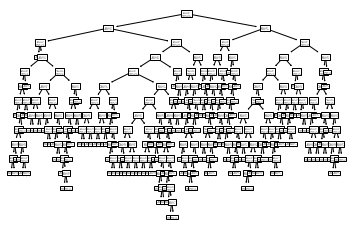

In [28]:
tree.plot_tree(dt.fit(x_train,y_train))

In [29]:
from sklearn.datasets import load_iris
from sklearn import tree
X, y = load_iris(return_X_y=True)
y
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train,y_train)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

[Text(174.50884046052633, 210.192, 'X[1] <= 0.5\ngini = 0.472\nsamples = 889\nvalue = [549, 340]'),
 Text(96.28100328947369, 195.696, 'X[0] <= 1.5\ngini = 0.306\nsamples = 577\nvalue = [468, 109]'),
 Text(30.10263157894737, 181.2, 'X[5] <= 1.0\ngini = 0.466\nsamples = 122\nvalue = [77, 45]'),
 Text(28.144736842105264, 166.704, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(32.060526315789474, 166.704, 'X[2] <= 1.5\ngini = 0.475\nsamples = 116\nvalue = [71, 45]'),
 Text(13.705263157894738, 152.208, 'X[3] <= 2.0\ngini = 0.499\nsamples = 25\nvalue = [12, 13]'),
 Text(11.747368421052633, 137.712, 'X[4] <= 1.5\ngini = 0.497\nsamples = 24\nvalue = [11, 13]'),
 Text(7.831578947368421, 123.216, 'X[2] <= 0.5\ngini = 0.499\nsamples = 19\nvalue = [10, 9]'),
 Text(5.873684210526316, 108.72, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(9.789473684210527, 108.72, 'X[4] <= 0.5\ngini = 0.48\nsamples = 15\nvalue = [6, 9]'),
 Text(7.831578947368421, 94.22399999999999, 'X[6] <= 0.5\ngini = 0.473\

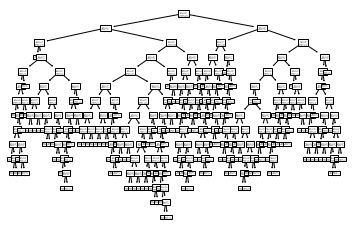

In [31]:
tree.plot_tree(clf.fit(x_train,y_train)) 